In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social Media Usage and Emotional Well-Being.csv')

In [3]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [4]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500.0,27.0,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,488.0,21.0,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Handling Missing Values:

In [5]:
df.dropna(inplace =True)

In [19]:
df.isna().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

# User Demographics:


### What is the average age of users on different social media platforms?




In [6]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,500.0,27.0,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
3,488.0,21.0,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
5,776.0,28.0,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27.0,Anxiety
7,869.0,27.0,Male,Telegram,105.0,3.0,48.0,20.0,28.0,Anxiety
9,573.0,21.0,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral


In [4]:
print("Unique values in 'Age' column:", df['Age'].unique())

Unique values in 'Age' column: [27. 21. 28. 25. 24. 33. 32. 23. 35. 31. 34. 29. 22. 26. 30.]


In [5]:
Average = df.groupby('Platform')['Age'].mean().sort_values(ascending=False)

<Axes: ylabel='Platform'>

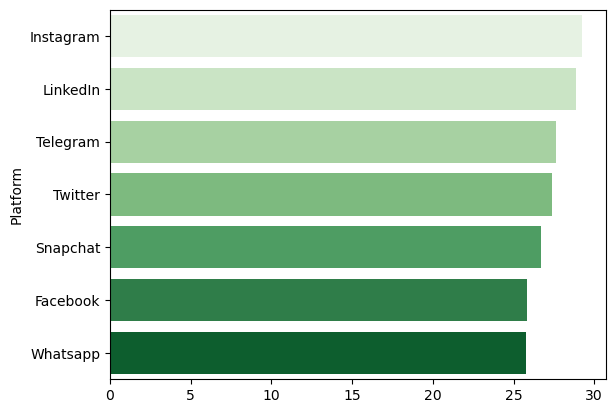

In [26]:
sns.barplot(x=Average.values,y=Average.index , palette = "Greens")

### How does daily usage time vary by age and gender?

In [33]:
df.groupby('Gender')['Daily_Usage_Time (minutes)'].mean()

Gender
Female        112.500000
Male           81.086957
Non-binary     74.833333
Name: Daily_Usage_Time (minutes), dtype: float64

In [7]:
df['Gender'] = df['Gender'].replace('Marie', 'Female')

<Axes: xlabel='Age', ylabel='Daily_Usage_Time (minutes)'>

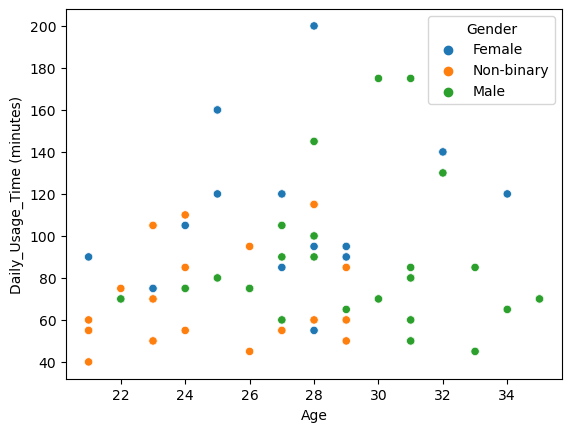

In [35]:
sns.scatterplot(x='Age',y='Daily_Usage_Time (minutes)',data=df,hue='Gender' )

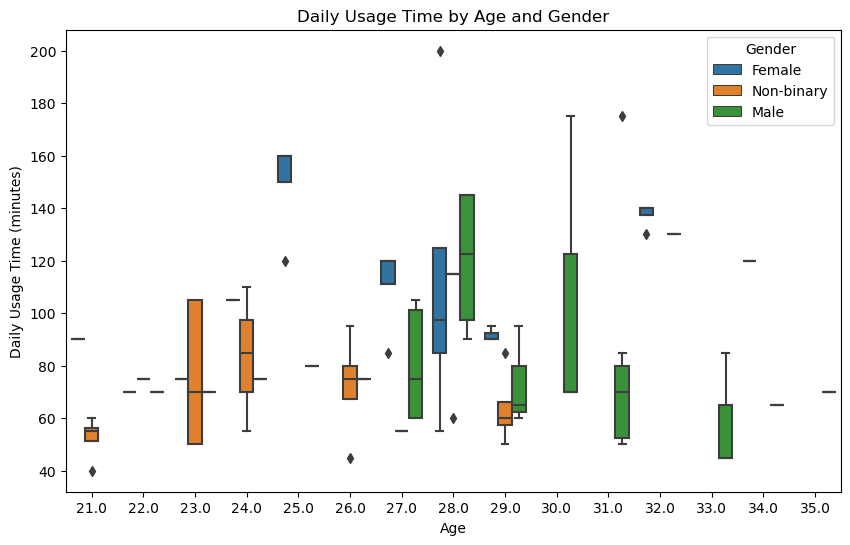

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Daily_Usage_Time (minutes)', hue='Gender', data=df)
plt.title('Daily Usage Time by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()


# Platform Usage:

### Which social media platform has the highest average daily usage time?

In [42]:

highest_Average = df.groupby('Platform')['Daily_Usage_Time (minutes)'].mean().sort_values(ascending=False)
highest_Average


Platform
Instagram    149.333333
Snapchat      98.076923
Whatsapp      82.500000
Twitter       81.052632
Telegram      74.090909
Facebook      73.800000
LinkedIn      57.000000
Name: Daily_Usage_Time (minutes), dtype: float64

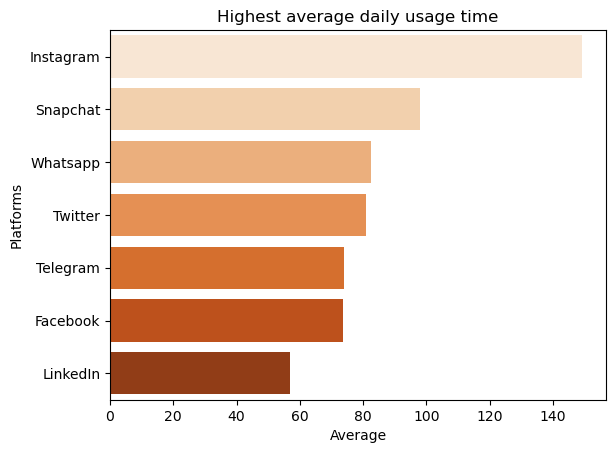

In [75]:
sns.barplot(x=highest_Average.values,y=highest_Average.index,palette='Oranges')
plt.title('Highest average daily usage time')
plt.xlabel('Average')
plt.ylabel('Platforms')
plt.show()

### Is there a significant difference in daily usage time between different genders on each platform?

In [69]:
usage_stats = df.groupby(['Platform', 'Gender'])['Daily_Usage_Time (minutes)'].mean().reset_index()
usage_stats

,Platform,Gender,Daily_Usage_Time (minutes)
0,Facebook,Female,70.000000
1,Facebook,Male,70.555556
2,Facebook,Non-binary,76.428571
3,Instagram,Female,147.000000
4,Instagram,Male,154.000000
5,LinkedIn,Female,55.000000
6,LinkedIn,Male,60.625000
7,LinkedIn,Non-binary,52.500000
8,Snapchat,Female,109.000000
9,Snapchat,Non-binary,91.250000


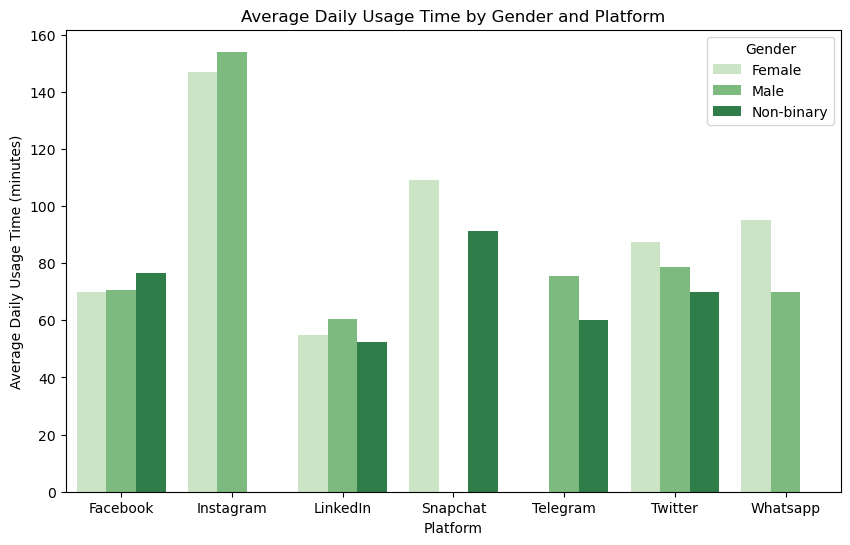

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', hue='Gender', data=usage_stats,palette='Greens')
plt.title('Average Daily Usage Time by Gender and Platform')
plt.xlabel('Platform')
plt.ylabel('Average Daily Usage Time (minutes)')
plt.show()

# Activity and Engagement:

### What is the average number of posts per day across different platforms?


In [8]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [12]:
Average_Post = df.groupby('Platform')['Posts_Per_Day'].mean().sort_values(ascending=False)
Average_Post

Platform
Instagram    5.866667
Whatsapp     3.000000
Snapchat     2.846154
Twitter      2.842105
Telegram     2.818182
Facebook     1.920000
LinkedIn     1.266667
Name: Posts_Per_Day, dtype: float64

<Axes: ylabel='Platform'>

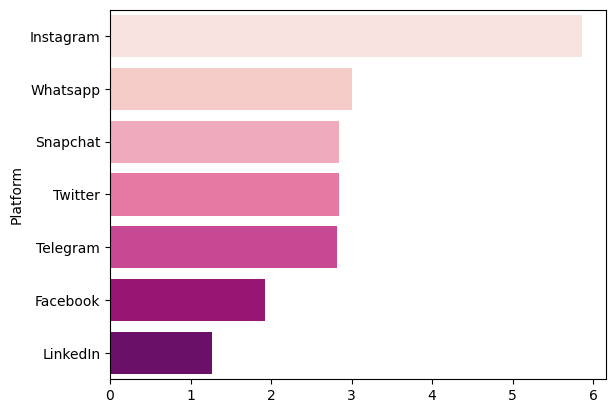

In [17]:
sns.barplot(x=Average_Post.values,y=Average_Post.index,palette='RdPu')

### How do the number of likes and comments received per day vary across different platforms?

In [18]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [21]:
no = df.groupby('Platform')[['Likes_Received_Per_Day', 'Comments_Received_Per_Day']].count()
no

,Likes_Received_Per_Day,Comments_Received_Per_Day
Platform,,
Facebook,25,25
Instagram,15,15
LinkedIn,15,15
Snapchat,13,13
Telegram,11,11
Twitter,19,19
Whatsapp,4,4


# Communication Patterns:

### What is the average number of messages sent per day by users on different platforms?


In [27]:
df.groupby('Platform')[['Messages_Sent_Per_Day']].mean()

,Messages_Sent_Per_Day
Platform,
Facebook,16.320000
Instagram,32.066667
LinkedIn,13.000000
Snapchat,22.307692
Telegram,20.909091
Twitter,20.210526
Whatsapp,21.000000


### Is there a correlation between the number of messages sent per day and the user's dominant emotion? 

In [28]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

<Axes: xlabel='Dominant_Emotion', ylabel='Messages_Sent_Per_Day'>

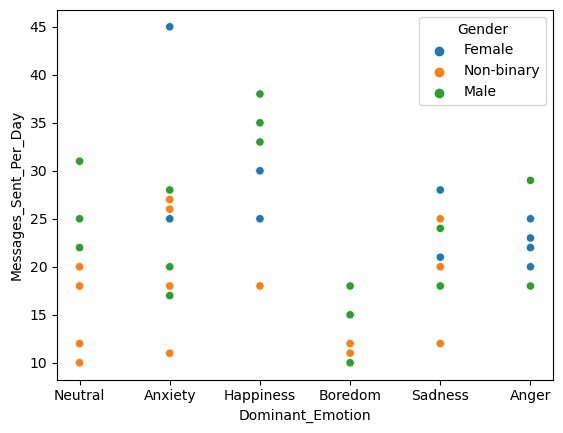

In [34]:
sns.scatterplot(x='Dominant_Emotion',y='Messages_Sent_Per_Day',data=df,hue ='Gender')

# Emotional Well-Being:

### What is the most common dominant emotion among users on different social media platforms?

In [9]:
common_emotion = df.groupby('Platform')['Dominant_Emotion'].count().sort_values(ascending=False)
common_emotion

Platform
Facebook     25
Twitter      19
Instagram    15
LinkedIn     15
Snapchat     13
Telegram     11
Whatsapp      4
Name: Dominant_Emotion, dtype: int64

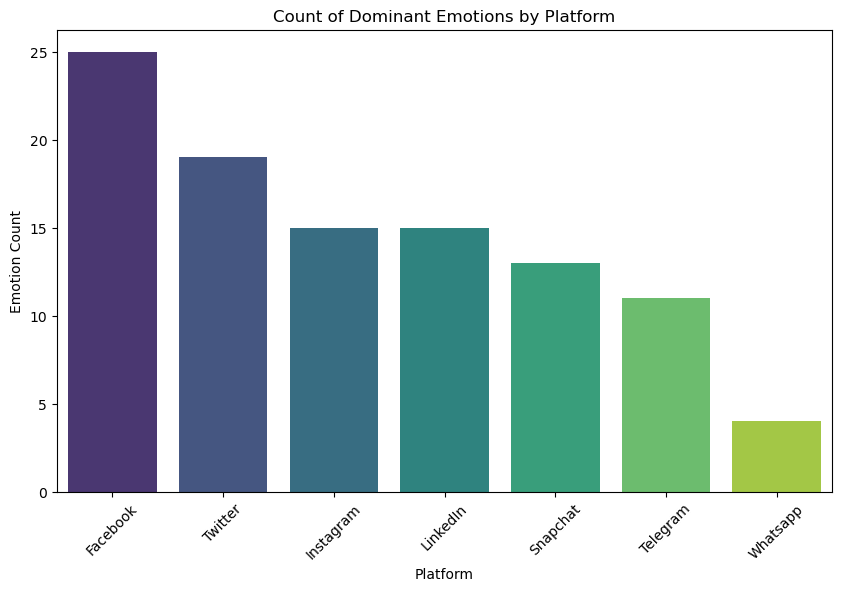

In [12]:

common_emotion_df = common_emotion.reset_index()

common_emotion_df.columns = ['Platform', 'Emotion_Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=common_emotion_df, x='Platform', y='Emotion_Count', palette='viridis')
plt.title('Count of Dominant Emotions by Platform')
plt.xlabel('Platform')
plt.ylabel('Emotion Count')
plt.xticks(rotation=45)
plt.show()

# Age and Emotional Well-Being:



### Is there a correlation between age and the dominant emotion experienced by users?


In [14]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,500.0,27.0,Female,Snapchat,120.0,4.0,40.0,18.0,22.0,Neutral
3,488.0,21.0,Non-binary,Snapchat,60.0,1.0,18.0,7.0,12.0,Neutral
5,776.0,28.0,Non-binary,Snapchat,115.0,3.0,38.0,18.0,27.0,Anxiety
7,869.0,27.0,Male,Telegram,105.0,3.0,48.0,20.0,28.0,Anxiety
9,573.0,21.0,Non-binary,Facebook,55.0,3.0,17.0,7.0,12.0,Neutral


<Figure size 1000x600 with 0 Axes>

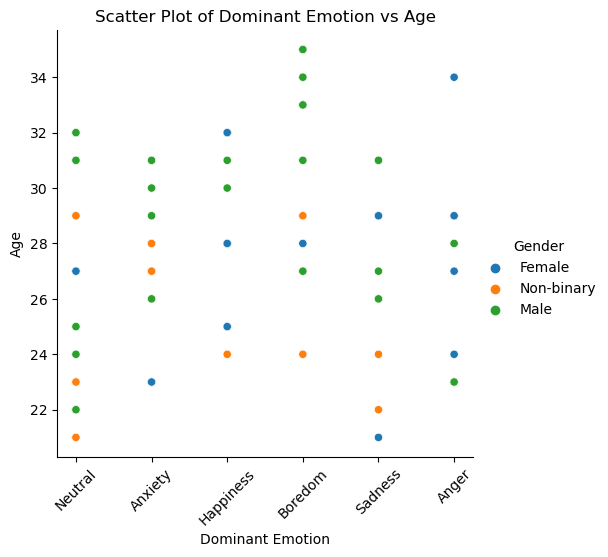

In [24]:
plt.figure(figsize=(10, 6))
sns.relplot(data=df, x='Dominant_Emotion', y='Age',hue='Gender')
plt.title('Scatter Plot of Dominant Emotion vs Age')
plt.xlabel('Dominant Emotion')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Gender Differences:



### Are there significant differences in the number of posts, likes, comments, and messages between males and females?

In [40]:
gender_grouped = df.groupby('Gender')[['Posts_Per_Day','Likes_Received_Per_Day','Comments_Received_Per_Day','Messages_Sent_Per_Day']].mean()
gender_grouped

,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
Gender,,,,
Female,4.076923,49.653846,19.269231,24.615385
Male,2.630435,30.913043,12.869565,20.195652
Non-binary,2.066667,21.600000,9.833333,16.766667


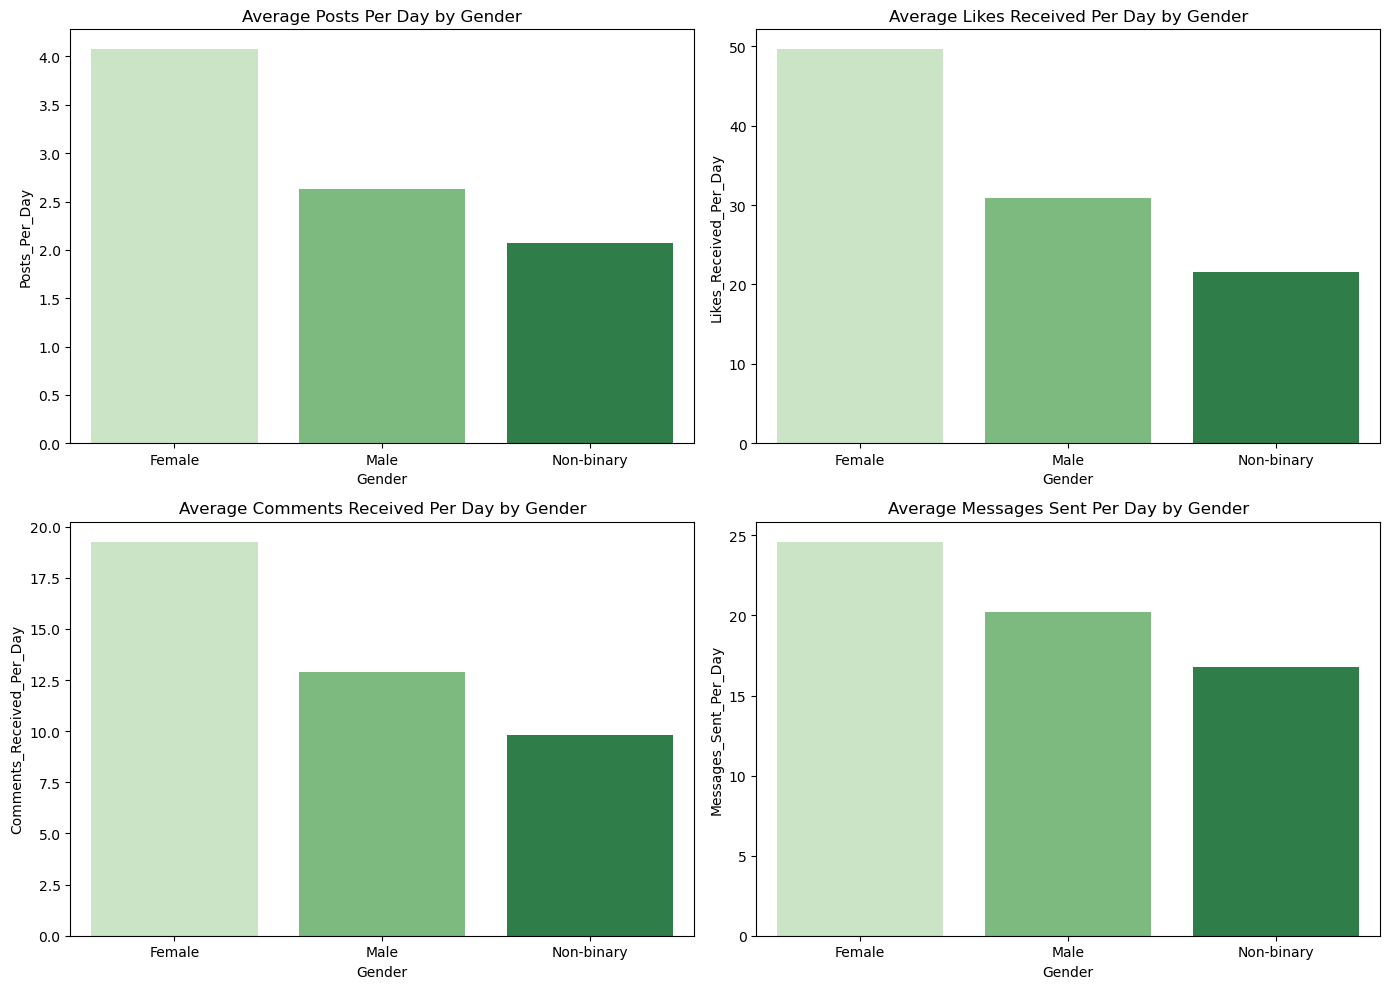

In [50]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x=gender_grouped.index, y=gender_grouped['Posts_Per_Day'], ax=axes[0, 0],palette='Greens')
axes[0, 0].set_title('Average Posts Per Day by Gender')

sns.barplot(x=gender_grouped.index, y=gender_grouped['Likes_Received_Per_Day'], ax=axes[0, 1],palette='Greens')
axes[0, 1].set_title('Average Likes Received Per Day by Gender')

sns.barplot(x=gender_grouped.index, y=gender_grouped['Comments_Received_Per_Day'], ax=axes[1, 0],palette='Greens')
axes[1, 0].set_title('Average Comments Received Per Day by Gender')

sns.barplot(x=gender_grouped.index, y=gender_grouped['Messages_Sent_Per_Day'], ax=axes[1, 1],palette='Greens')
axes[1, 1].set_title('Average Messages Sent Per Day by Gender')

plt.tight_layout()
plt.show()

In [52]:
# Separate data by gender
from scipy.stats import ttest_ind
males = df[df['Gender'] == 'Male']
females = df[df['Gender'] == 'Female']

# Perform t-tests
posts_ttest = ttest_ind(males['Posts_Per_Day'], females['Posts_Per_Day'], nan_policy='omit')
likes_ttest = ttest_ind(males['Likes_Received_Per_Day'], females['Likes_Received_Per_Day'], nan_policy='omit')
comments_ttest = ttest_ind(males['Comments_Received_Per_Day'], females['Comments_Received_Per_Day'], nan_policy='omit')
messages_ttest = ttest_ind(males['Messages_Sent_Per_Day'], females['Messages_Sent_Per_Day'], nan_policy='omit')

# Print the t-test results
print(f"Posts Per Day t-test: {posts_ttest}")
print(f"Likes Received Per Day t-test: {likes_ttest}")
print(f"Comments Received Per Day t-test: {comments_ttest}")
print(f"Messages Sent Per Day t-test: {messages_ttest}")


Posts Per Day t-test: TtestResult(statistic=-3.4828701749631596, pvalue=0.0008594034817207723, df=70.0)
Likes Received Per Day t-test: TtestResult(statistic=-3.3197852815017774, pvalue=0.0014329158858026848, df=70.0)
Comments Received Per Day t-test: TtestResult(statistic=-3.36395829212824, pvalue=0.0012494212223627176, df=70.0)
Messages Sent Per Day t-test: TtestResult(statistic=-2.4534562744499815, pvalue=0.01664179686936823, df=70.0)


### How does the dominant emotion differ between males and females?

In [62]:
emotion_by_gender = df.groupby(['Gender', 'Dominant_Emotion']).size().reset_index(name='Count')
emotion_by_gender

,Gender,Dominant_Emotion,Count
0,Female,Anger,4
1,Female,Anxiety,4
2,Female,Boredom,1
3,Female,Happiness,8
4,Female,Neutral,6
5,Female,Sadness,3
6,Male,Anger,4
7,Male,Anxiety,10
8,Male,Boredom,12
9,Male,Happiness,4


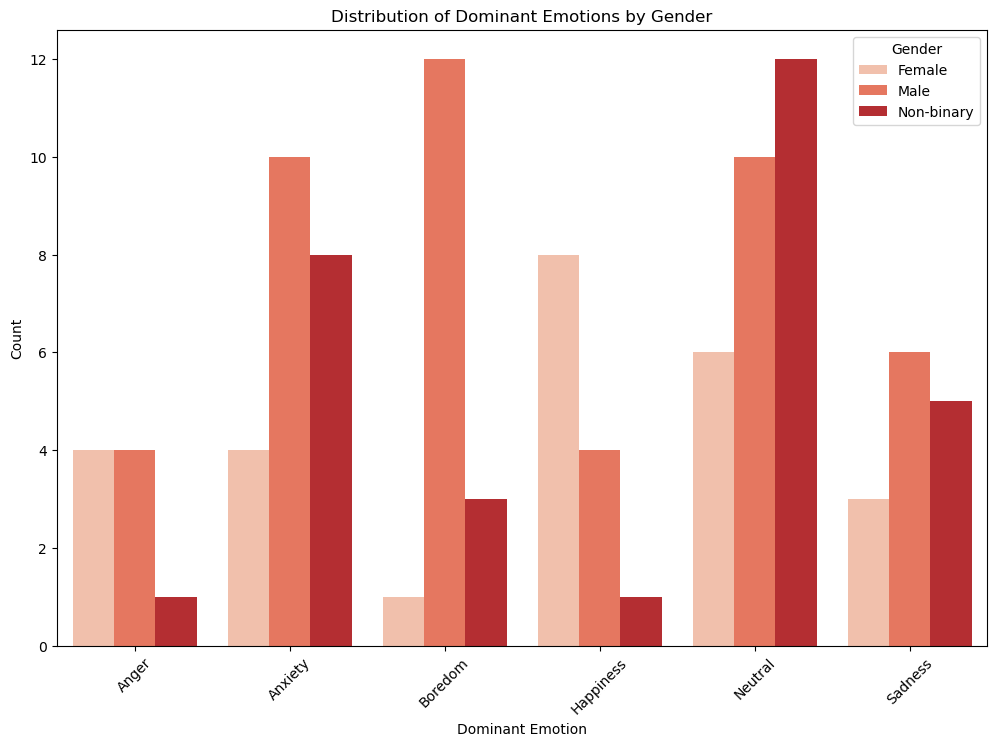

In [66]:
# Plotting the data using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Dominant_Emotion', y='Count', hue='Gender', data=emotion_by_gender,palette='Reds')

# Set plot title and labels
plt.title('Distribution of Dominant Emotions by Gender')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Display the plot
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


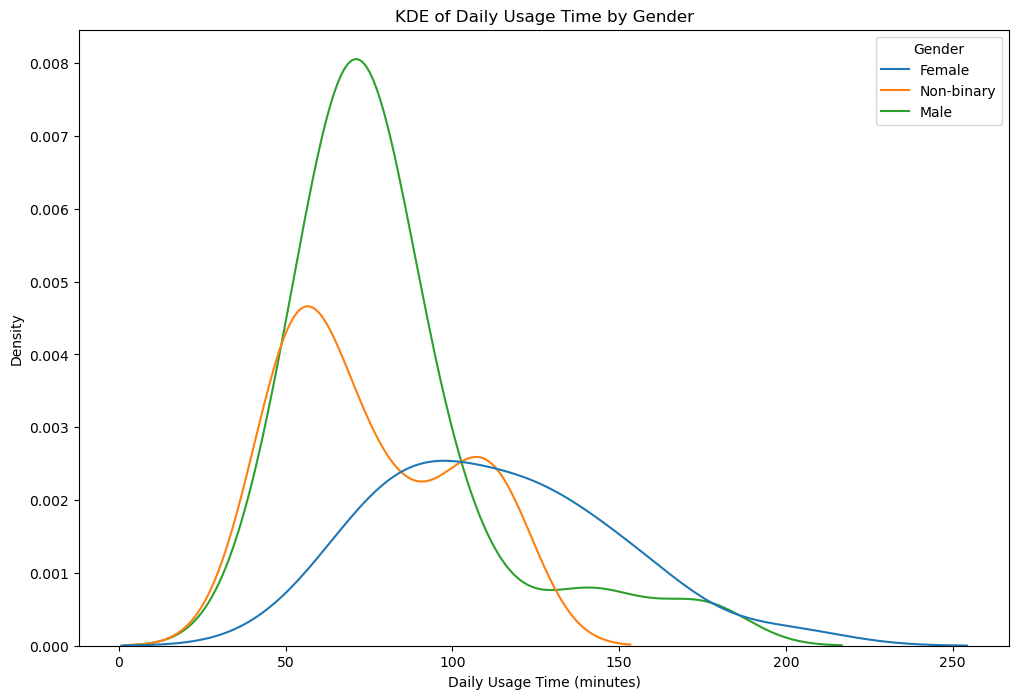

In [68]:
# Plotting KDE for Daily Usage Time by Gender
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='Daily_Usage_Time (minutes)', hue='Gender')

# Set plot title and labels
plt.title('KDE of Daily Usage Time by Gender')
plt.xlabel('Daily Usage Time (minutes)')
plt.ylabel('Density')

# Display the plot
plt.show()
